In [3]:
import pandas as pd
import os

def get_avg_depth_crit():
    # Initialize a list to store the data
    data = []
    
    # Get a list of all files in the current directory
    files = [f for f in os.listdir('.') if f.endswith('.csv')]
    
    # Loop through each file
    for file in files:
        # Load the CSV file into a dataframe
        df = pd.read_csv(file)
        
        # Calculate the average depth and crit
        avg_depth = df['depth'].mean()
        avg_crit =  df['crit'].mean()
        
        # Append the results to the data list
        data.append({'filename': file, 'average_depth': avg_depth, 'average_crit': avg_crit})
    
    # Convert the list to a DataFrame
    results_df = pd.DataFrame(data)
    
    # Sort the DataFrame by the 'average_crit' column
    results_df_sorted = results_df.sort_values(by='average_crit', ascending=True)
    
    # Return the sorted DataFrame
    return results_df_sorted


In [4]:
# Now you can call the function and store the result
df = get_avg_depth_crit()
print(df)

                     filename  average_depth  average_crit
21     sabre_v0_20_crit_1.csv     311.858586          1.00
12  sabre_v0_20_crit_1.01.csv     321.474747          1.01
13  sabre_v0_20_crit_1.02.csv     323.636364          1.02
16  sabre_v0_20_crit_1.03.csv     319.191919          1.03
19  sabre_v0_20_crit_1.04.csv     321.111111          1.04
20  sabre_v0_20_crit_1.05.csv     323.626263          1.05
18  sabre_v0_20_crit_1.06.csv     320.010101          1.06
17  sabre_v0_20_crit_1.07.csv     319.626263          1.07
3   sabre_v0_20_crit_1.08.csv     321.828283          1.08
6   sabre_v0_20_crit_1.09.csv     315.959596          1.09
7    sabre_v0_20_crit_1.1.csv     320.727273          1.10
4    sabre_v0_20_crit_1.2.csv     318.535354          1.20
5    sabre_v0_20_crit_1.3.csv     320.494949          1.30
8    sabre_v0_20_crit_1.4.csv     322.929293          1.40
9    sabre_v0_20_crit_1.5.csv     321.050505          1.50
11   sabre_v0_20_crit_1.6.csv     317.161616          1.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_avg_depth_crit(df, x_label, y_label, title, rp, baseline_values=None):
    baseline_names = ['Sabre', 'Sabre Extended', 'Sabre Depth']

    # Set the style of the visualization
    sns.set(style="whitegrid")
    
    # Create the scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='average_crit', y='average_depth', data=df, label=rp)
    
    # Add baselines if provided
    if baseline_values:
        colors = ['r', 'g', 'b']  # Colors for the baselines
        for i, value in enumerate(baseline_values):
            if i < len(colors):  # To ensure we have predefined colors
                # Add a horizontal line at the baseline value
                plt.axhline(y=value, color=colors[i], linestyle='--', label=baseline_names[i])
    
    # Customize the plot with the provided labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Add a legend if there are baselines
    if baseline_values:
        plt.legend()
    
    # change legend position to top right outside the plot
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

    
    # Show the plot
    plt.show()



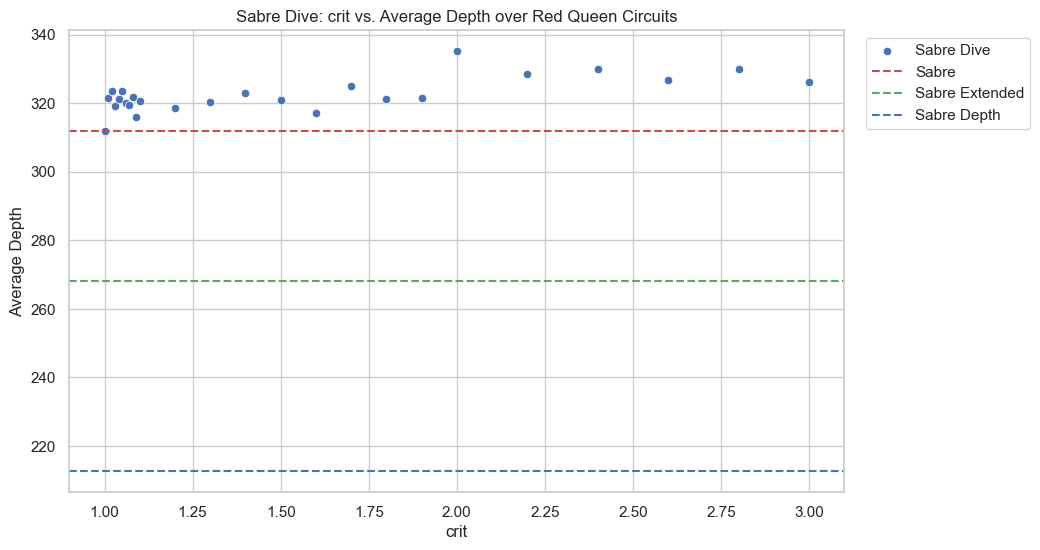

In [18]:
# Assuming `df_sorted` is the dataframe you have from the previous function
baseline_values = [311.858586, 268.161616, 212.636364]  # Example baselines
x_label = 'crit'
y_label = 'Average Depth'
rp = 'Sabre Dive'
title = f'{rp}: crit vs. Average Depth over Red Queen Circuits'
plot_avg_depth_crit(df, x_label=x_label, y_label=y_label, title=title, rp=rp, baseline_values=baseline_values)
